# Delaney with FF-DNN

In [15]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam, SGD, 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [16]:
# 1. Load and preprocess the data
df = pd.read_csv('delaney-processed.csv')

In [17]:
df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


In [18]:
features = ['Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area']
target = 'measured log solubility in mols per litre'

In [19]:
X = df[features]
y = df[target]

In [22]:
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [23]:
X_train

,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area
930,1,162.276,0,1,0,0.00
670,1,187.375,0,0,1,0.00
65,1,366.844,1,4,2,54.37
398,1,298.367,0,3,4,42.43
736,1,242.321,0,4,0,0.00
...,...,...,...,...,...,...
121,1,114.232,0,0,2,0.00
1044,1,110.181,1,1,0,0.00
1095,1,288.255,4,3,1,107.22
860,1,137.138,0,1,1,39.19


In [20]:
# Normalize the data
scaler = StandardScaler()

| Scaler | Equation | When to Use | Preserves Zero Mean? | Sensitivity to Outliers | Range After Scaling |
|--------|----------|-------------|----------------------|-------------------------|---------------------|
| StandardScaler | $ z = \frac{(x - \mu)}{\sigma} $ | When features have different units or different variances. Most suitable for algorithms that assume zero-centered data. | Yes | No | Varies |
| MinMaxScaler | $ z = \frac{(x - \text{min})}{\text{max} - \text{min}} $ | When you need values in a bounded interval. Scales the data to a specific range, typically [0, 1] or [-1, 1]. | No | Yes | [0, 1] or Custom |
| MaxAbsScaler | $ z = \frac{x}{\max(\|x\|)} $ | Useful for zero-centered or sparse data. | Yes, if data is zero-centered | Yes | [-1, 1] |
| RobustScaler | $ z = \frac{(x - \text{median})}{\text{IQR}} $ | When the data contains many outliers. Uses median and the interquartile range for scaling. | No | No | Varies |
| QuantileTransformer (uniform output) | Transforms features to follow a uniform distribution | When you want to transform features to follow a uniform distribution. Useful for non-linear data. | No | No | [0, 1] |
| QuantileTransformer (normal output) | Transforms features to follow a normal distribution | When you want to transform features to follow a normal distribution. Useful for non-linear data. | No | No | Varies, but closer to normal distribution |
| PowerTransformer | Applies a power transformation to each feature | Useful for stabilizing variance and making the data more Gaussian-like. | Yes | No | Varies, but closer to normal distribution |
| Normalizer | $ z = \frac{x}{\sqrt{x_1^2 + x_2^2 + \dots + x_n^2}} $ | Each parameter vector $x$ is normalized individually. Used when only the angle between feature vectors matter. Not really a scaler, but a normalizer. | No | No | Norm 1 |

### Notes:
- "Varies" in the "Range After Scaling" column means that the range isn't fixed and depends on the data.
- "Norm 1" means that the Euclidean norm of each data vector will be 1.
- $ \mu $ is the mean of the feature.
- $ \sigma $ is the standard deviation of the feature.
- $ \text{min} $ and $ \text{max} $ are the minimum and maximum values of the feature, respectively.
- $ \text{IQR} $ is the interquartile range, $ \text{Q3} - \text{Q1} $, where $ \text{Q3} $ and $ \text{Q1} $ are the third and first quartiles, respectively.

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train

,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area
930,1,162.276,0,1,0,0.00
670,1,187.375,0,0,1,0.00
65,1,366.844,1,4,2,54.37
398,1,298.367,0,3,4,42.43
736,1,242.321,0,4,0,0.00
...,...,...,...,...,...,...
121,1,114.232,0,0,2,0.00
1044,1,110.181,1,1,0,0.00
1095,1,288.255,4,3,1,107.22
860,1,137.138,0,1,1,39.19


In [26]:
X_train_scaled

array([[-0.22212218, -0.3866131 , -0.65184586, -0.26851487, -0.82757038,
        -0.99457157],
       [-0.22212218, -0.14351987, -0.65184586, -1.02786337, -0.45252556,
        -0.99457157],
       [-0.22212218,  1.59470475,  0.26004489,  2.00953064, -0.07748074,
         0.54558773],
       ...,
       [-0.22212218,  0.83354079,  2.99571714,  1.25018213, -0.45252556,
         2.04268942],
       [-0.22212218, -0.63008407, -0.65184586, -0.26851487, -0.45252556,
         0.1155782 ],
       [-0.22212218, -1.25950755, -0.65184586, -1.02786337, -0.45252556,
        -0.99457157]])

In [65]:
# # # Add dropout and regularization
from tensorflow.keras.layers import Dropout
# from tensorflow.keras import regularizers

In [75]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20) # restore_best_weights=True

In [76]:
X_train.shape

(789, 6)

In [86]:
# 2. Define the model
model = Sequential()
model.add(InputLayer(input_shape=(6,)))  # Explicit input layer with 6 features
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))  # Output layer

In [87]:
# Compile the model
opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss='mse', metrics=['mse'])

In [88]:
# # 3. Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_val_scaled, y_val), verbose=1, callbacks=[early_stopping])
#history = model.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_val_scaled, y_val), verbose=1)

Epoch 1/200


25/25 [==============================] - 5s 24ms/step - loss: 13.2081 - mse: 13.2081 - val_loss: 14.1299 - val_mse: 14.1299
Epoch 2/200
25/25 [==============================] - 0s 9ms/step - loss: 11.2390 - mse: 11.2390 - val_loss: 11.8129 - val_mse: 11.8129
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 8.6601 - mse: 8.6601 - val_loss: 8.3632 - val_mse: 8.3632
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 5.5790 - mse: 5.5790 - val_loss: 4.8325 - val_mse: 4.8325
Epoch 5/200
25/25 [==============================] - 0s 11ms/step - loss: 3.5979 - mse: 3.5979 - val_loss: 3.1613 - val_mse: 3.1613
Epoch 6/200
25/25 [==============================] - 0s 8ms/step - loss: 3.0692 - mse: 3.0692 - val_loss: 2.6507 - val_mse: 2.6507
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 2.5552 - mse: 2.5552 - val_loss: 2.4517 - val_mse: 2.4517
Epoch 8/200
25/25 [==============================] - 0s 9ms/step - loss: 2.4388 - mse

In [89]:
# # 4. Evaluate the model
test_loss, test_mse = model.evaluate(X_test_scaled, y_test, verbose=1)

1/6 [====>.........................] - ETA: 0s - loss: 0.5076 - mse: 0.5076

6/6 [==============================] - 0s 5ms/step - loss: 0.7999 - mse: 0.7999


In [90]:
# Make predictions
y_pred = model.predict(X_test_scaled)

6/6 [==============================] - 0s 4ms/step


In [91]:
# Calculate R^2 and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {np.sqrt(test_mse)}")
print(f"Test R^2: {r2}")
print(f"Test MAE: {mae}")

Test MSE: 0.7999120354652405
Test RMSE: 0.8943780159782778
Test R^2: 0.8042001879196463
Test MAE: 0.6507060085294878


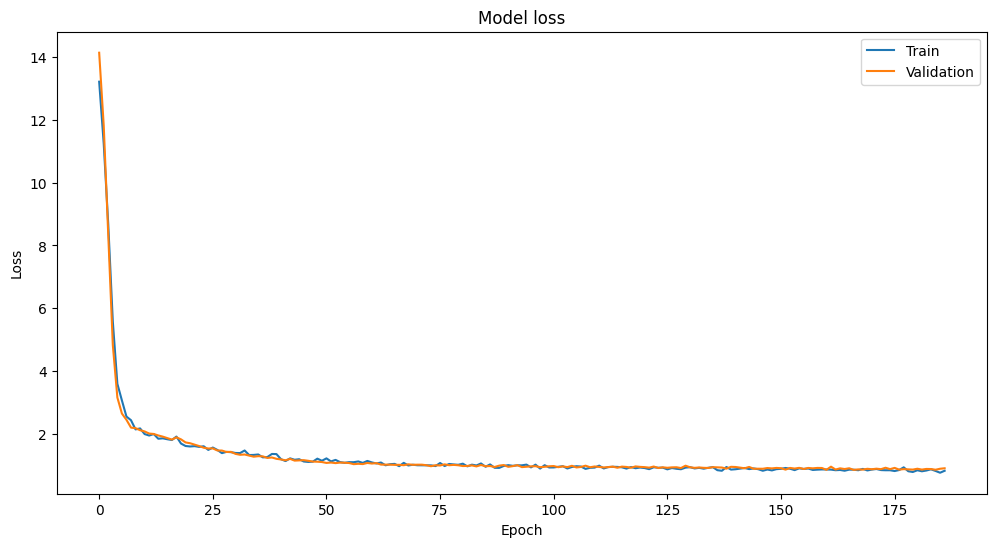

In [92]:
# 5. Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Plot metrics

     True_Values  Predicted_Values
424       -3.952         -3.405760
507       -1.110         -1.640136
49        -1.940         -2.503071
858       -4.207         -3.831734
629       -2.670         -2.439370


c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


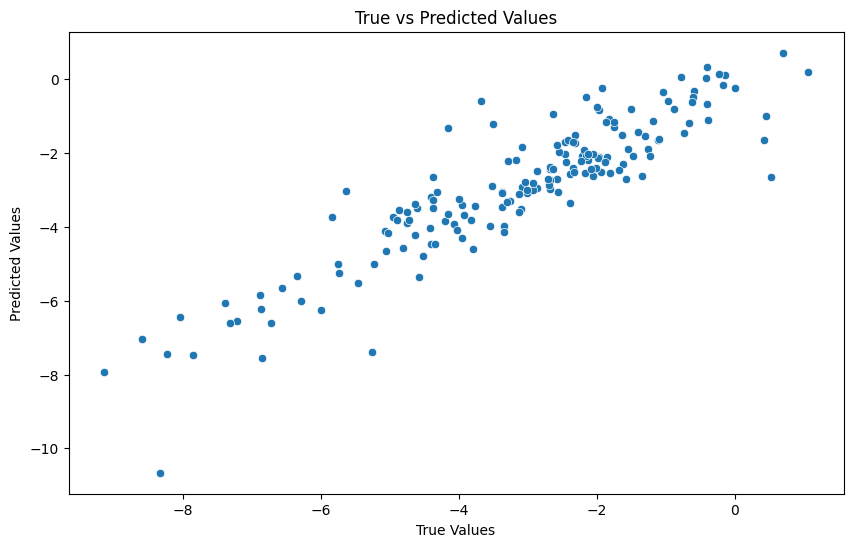

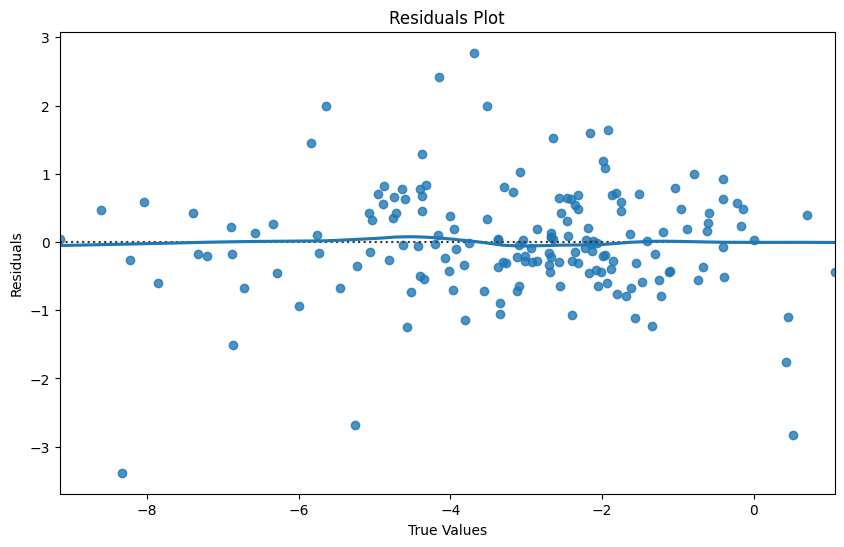

c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


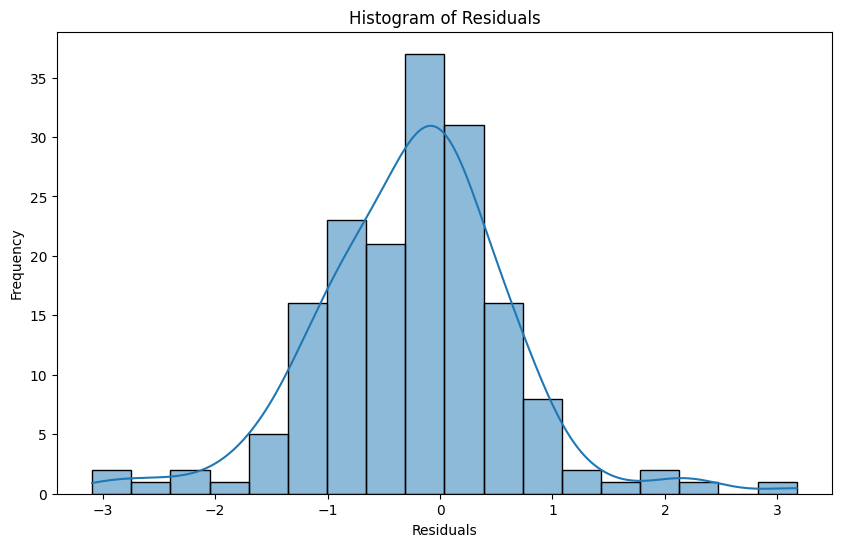

In [93]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred = y_pred.reshape(-1)

# Create a dataframe to compare true and predicted values
comparison_df = pd.DataFrame({'True_Values': y_test, 'Predicted_Values': y_pred})

# Display the comparison dataframe
print(comparison_df.head())

# Plotting true vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='True_Values', y='Predicted_Values', data=comparison_df)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

# Residuals plot
plt.figure(figsize=(10, 6))
sns.residplot(x='True_Values', y='Predicted_Values', data=comparison_df, lowess=True)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Histogram of residuals
residuals = comparison_df['True_Values'] - comparison_df['Predicted_Values']
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()